In [1]:
# # This code allows to output more than one variable value without using a print statement.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# # Default
# # InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
# Version Check
import sys
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import pandas as pd
import numpy as np
import scipy
print("python", sys.version)
print("tensorflow", tf.__version__)
print("tensorflow-datasets", tfds.__version__)
print("Pillow", PIL.__version__)
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("scipy", scipy.__version__)
print()
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())

python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.6.2
tensorflow-datasets 4.4.0
Pillow 8.3.2
pandas 1.3.3
numpy 1.19.5
scipy 1.7.1

Num GPUs Available: 1
Built with CUDA: True
Built with GPU support: True


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set:', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


## Initialization

In [4]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [6]:
# by using str
dense = tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [7]:
# or by using class instance
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=he_normal)
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [8]:
# common initializers
# - 'glorot_normal', 'glorot_uniform': Global initializers (Xavier initializers)
# - 'lecun_normal', 'lecun_uniform': Yann Lecun initializers
# - 'he_normal', 'he_uniform': He initializers
# - 'random_normal', 'random_uniform': random normal distribution initializer, random uniform distribution initializer

## Regularization

In [9]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [10]:
# l1 regularization - by using str
dense = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l1')
dense.get_config()['kernel_regularizer']

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}

In [11]:
# l1 (w/ alpha=0.1) - by using class instance
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer)
dense.get_config()['kernel_regularizer']

{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}

## Dropout

In [12]:
tf.keras.layers.Dropout(0.25)

## Batch Normalization

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Model A: Dense + ReLU

model_a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras.layers import BatchNormalization, Activation

# Model B: Dense + BatchNorm + ReLU

model_b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64),
    BatchNormalization(),   # BatchNorm between Dense and Activation
    Activation('relu'),
    Dense(32),
    BatchNormalization(),   # BatchNorm between Dense and Activation
    Activation('relu'),
    Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)               

In [15]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5323 - acc: 0.8253 - val_loss: 0.3700 - val_acc: 0.9035
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - acc: 0.9226 - val_loss: 0.2455 - val_acc: 0.9341
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2222 - acc: 0.9384 - val_loss: 0.2164 - val_acc: 0.9432
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1936 - acc: 0.9468 - val_loss: 0.1747 - val_acc: 0.9501
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - acc: 0.9538 - val_loss: 0.1814 - val_acc: 0.9518
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - acc: 0.9595 - val_loss: 0.1836 - val_acc: 0.9507
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - acc: 0.9619 - val_loss: 0.1791 - val_acc: 0.9545
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

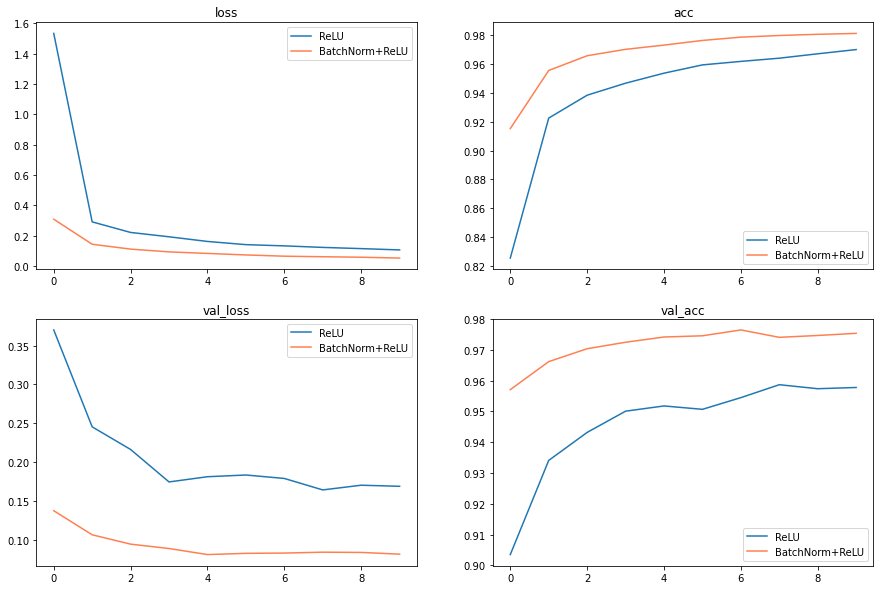

In [16]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax1.plot(history_a.history['loss'], label='ReLU')
ax1.plot(history_b.history['loss'], label='BatchNorm+ReLU', color='coral')
ax1.set_title('loss')
ax1.legend()

ax2.plot(history_a.history['acc'], label='ReLU')
ax2.plot(history_b.history['acc'], label='BatchNorm+ReLU', color='coral')
ax2.set_title('acc')
ax2.legend()

ax3.plot(history_a.history['val_loss'], label='ReLU')
ax3.plot(history_b.history['val_loss'], label='BatchNorm+ReLU', color='coral')
ax3.set_title('val_loss')
ax3.legend()

ax4.plot(history_a.history['val_acc'], label='ReLU')
ax4.plot(history_b.history['val_acc'], label='BatchNorm+ReLU', color='coral')
ax4.set_title('val_acc')
ax4.legend()

plt.show()

## Activation Function

In [17]:
# LeakyReLU
tf.keras.layers.LeakyReLU()

In [18]:
# LeakyReLU w/ alpha=0.2
tf.keras.layers.LeakyReLU(alpha=0.2)

In [19]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)

model_c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64),
    BatchNormalization(),   
    tf.keras.layers.LeakyReLU(alpha=0.2),  # LeakyReLU w/ alpha=0.2 
    Dense(32),
    BatchNormalization(), 
    tf.keras.layers.LeakyReLU(alpha=0.2),  # LeakyReLU w/ alpha=0.2 
    Dense(10, activation='softmax')
])
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32)               

In [20]:
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3228 - acc: 0.9098 - val_loss: 0.1435 - val_acc: 0.9574
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1549 - acc: 0.9532 - val_loss: 0.1099 - val_acc: 0.9678
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1242 - acc: 0.9613 - val_loss: 0.0985 - val_acc: 0.9703
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1067 - acc: 0.9664 - val_loss: 0.0928 - val_acc: 0.9718
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0947 - acc: 0.9699 - val_loss: 0.0817 - val_acc: 0.9752
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0867 - acc: 0.9722 - val_loss: 0.0885 - val_acc: 0.9719
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0758 - acc: 0.9754 - val_loss: 0.0803 - val_acc: 0.9751
Epoch 8/10
1875/1875 [==============================] - 7s 4ms

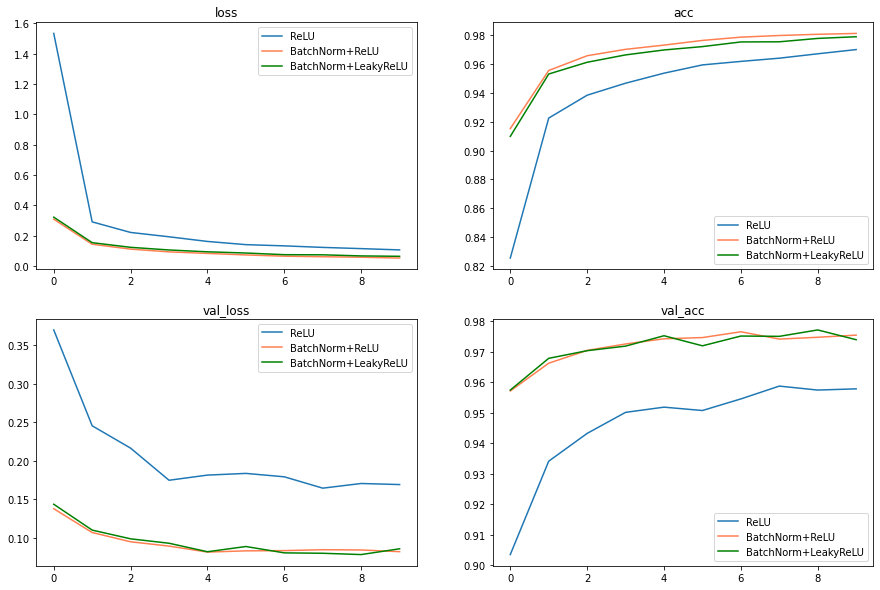

In [21]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax1.plot(history_a.history['loss'], label='ReLU')
ax1.plot(history_b.history['loss'], label='BatchNorm+ReLU', color='coral')
ax1.plot(history_c.history['loss'], label='BatchNorm+LeakyReLU', color='green')
ax1.set_title('loss')
ax1.legend()

ax2.plot(history_a.history['acc'], label='ReLU')
ax2.plot(history_b.history['acc'], label='BatchNorm+ReLU', color='coral')
ax2.plot(history_c.history['acc'], label='BatchNorm+LeakyReLU', color='green')
ax2.set_title('acc')
ax2.legend()

ax3.plot(history_a.history['val_loss'], label='ReLU')
ax3.plot(history_b.history['val_loss'], label='BatchNorm+ReLU', color='coral')
ax3.plot(history_c.history['val_loss'], label='BatchNorm+LeakyReLU', color='green')
ax3.set_title('val_loss')
ax3.legend()

ax4.plot(history_a.history['val_acc'], label='ReLU')
ax4.plot(history_b.history['val_acc'], label='BatchNorm+ReLU', color='coral')
ax4.plot(history_c.history['val_acc'], label='BatchNorm+LeakyReLU', color='green')
ax4.set_title('val_acc')
ax4.legend()

plt.show()

In [22]:
# Evaluate
print(model_a.evaluate(x_test, y_test))  # val_loss, val_acc
print(model_b.evaluate(x_test, y_test))  # val_loss, val_acc
print(model_c.evaluate(x_test, y_test))  # val_loss, val_acc

313/313 [==============================] - 0s 1ms/step - loss: 0.1691 - acc: 0.9578
[0.16905218362808228, 0.9577999711036682]
313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - acc: 0.9754
[0.08181926608085632, 0.9753999710083008]
313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - acc: 0.9739
[0.08557192236185074, 0.9739000201225281]


In [23]:
# Predict
prob_a = model_a.predict(x_test)
prob_b = model_b.predict(x_test)
prob_c = model_c.predict(x_test)

pred_a = np.argmax(prob_a, axis=1)
pred_b = np.argmax(prob_b, axis=1)
pred_c = np.argmax(prob_c, axis=1)

In [24]:
# Prediction result
from sklearn.metrics import classification_report

print("Prediction A")
print(classification_report(y_test, pred_a))
print("-----------------------------------------------------")
print("Prediction B")
print(classification_report(y_test, pred_b))
print("-----------------------------------------------------")
print("Prediction C")
print(classification_report(y_test, pred_c))

Prediction A
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.89      0.99      0.94      1010
           4       0.97      0.96      0.96       982
           5       0.93      0.95      0.94       892
           6       0.96      0.95      0.96       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.93      0.95       974
           9       0.97      0.92      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

-----------------------------------------------------
Prediction B
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      113